# Regressione lineare (parte 1 - max 1.5 punti)
Nella carriera di un ingegnere matematico la regressione lineare è uno strumento di straordinaria importanza, ma è veramente necessario vederla in 10 corsi diversi? E ogni volta dall'inizio?

Se non ne puoi più, salta questo assignment. 

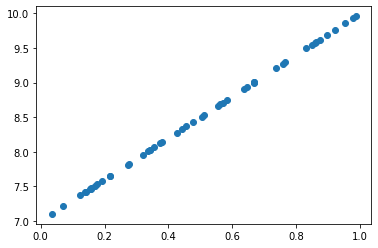

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Generazione dei dati 
n = 50 # numero di punti analizzati
X = np.random.rand(n)

true_beta = [7, 3]# [intercetta, coef. angolare]

y_true = true_beta[0] + true_beta[1] * X #y = 3x +7

plt.scatter(X, y_true)
plt.show()

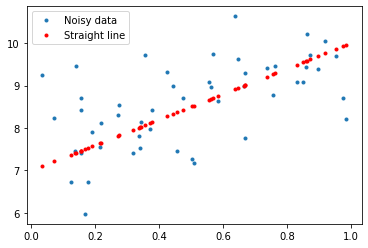

In [2]:
y = y_true + np.random.randn(n) # aggiungo un errore gaussiano standard
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.legend()
plt.show()

### Regressione lineare via least squares estimation

Considera come riferimento https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods

Calcola i parametri $\beta$ della regressione e plotta il risultato ottenuto

$\hat{\beta} = (X^T X)^{-1} X^T Y$

In [3]:
one = np.ones(n)
X_matr = np.c_[one, X]
stima_beta = np.dot(np.linalg.inv((np.dot(X_matr.transpose(),X_matr))),(np.dot(X_matr.transpose(),y)))
stima_beta

array([7.58758297, 2.00364768])

In [4]:
y_regr_ls = stima_beta[0] + stima_beta[1] * X
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_regr_ls, 'k.', label = "Regression line least squares")
plt.legend()
plt.show(

SyntaxError: ignored

### Regressione lineare via sklearn

Trova in sklearn ciò che fa al caso nostro e plotta il risultato ottenuto

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [6]:
X_col = np.reshape(X, (n,1))
reg = lin_reg.fit(X_col, y)
stima_beta_0 = reg.intercept_
stima_beta_1 = reg.coef_ 

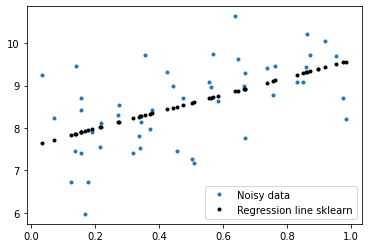

In [7]:
y_regr_sklearn = stima_beta_0 + stima_beta_1 * X
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_regr_sklearn, 'k.', label = "Regression line sklearn")
plt.legend()
plt.show()

### Regressione con batch gradient descent

Implementa la regressione tramite batch gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [8]:
def gradient_descent(alpha, x, y, err=0.0001, max_iter=10000):
    converged = False
    iter = 0
    #number of samples = n

    # initial beta
    beta_0 = np.random.random()
    beta_1 = np.random.random()

    # total error, J(beta)
    J = sum([(beta_0 + beta_1*x[i] - y[i])**2 for i in range(n)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (dJ(beta)/d_beta)
        gradJ_0 = 1.0/n * sum([(beta_0 + beta_1*x[i] - y[i]) for i in range(n)]) 
        gradJ_1 = 1.0/n * sum([(beta_0 + beta_1*x[i] - y[i])*x[i] for i in range(n)])

        # update the beta
        # (beta_0,beta_1) = (beta_0, beta_1) − alpha * (dJ/dbeta_0, dJ/dbeta_1)
        beta_0 = beta_0 - alpha * gradJ_0
        beta_1 = beta_1 - alpha * gradJ_1

        # mean squared error
        e = sum([ (beta_0 + beta_1*x[i] - y[i])**2 for i in range(n)]) 

        if abs(J-e) <= err:
            print('Converged, iterations: ', iter)
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return beta_0, beta_1

Converged, iterations:  3909
Converged, iterations:  540
Converged, iterations:  298
Converged, iterations:  226
Converged, iterations:  176
Converged, iterations:  144
Converged, iterations:  115
Converged, iterations:  99
Converged, iterations:  97
Converged, iterations:  83


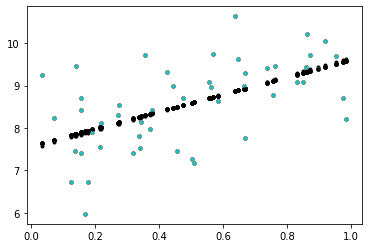

In [9]:
for alpha in range(1,100,10):
    beta0, beta1 = gradient_descent(alpha/100, X, y)
    y_regr_batch = beta0 + beta1 * X
    plt.plot(X, y, '.', label = "Noisy data")
    plt.plot(X, y_regr_batch, 'k.', label = "Regression line batch gradient descent")

In [10]:
beta0, beta1 = gradient_descent(2, X, y) #esempio dove non si arriva a convergenza

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


Max interactions exceeded!


### Regressione con stochastic gradient descent

Implementa la regressione tramite stochastic gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [11]:
def Stochastic_Gradient_Descent(X, y, learning_rate=0.2, n_iter=1000, k=40):
    
    b_1 = np.random.randn()
    b_0 = np.random.randn()# Random intercept value
    iter = 1
    
    while iter <= n_iter:
        
        temp_X = np.random.choice(X,k)
        temp_Y = np.random.choice(y,k)
        
        Lb_1 = b_1
        Lb_0 = b_0
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lb_1 = (-2/k * temp_Y[i]) * (temp_X[i] - np.dot(temp_X[i],b_1) - b_0)
            Lb_0 = (-2/k) * (temp_Y[i] - np.dot(temp_X[i],b_1) - b_0)
            
            b_1 = b_1 - learning_rate * Lb_1
            b_0 = b_0 - learning_rate * Lb_0
            
            y_predicted = np.dot(temp_X[i],b_1.T)
            y_pred.append(y_predicted)
        
        #mean squared error
        loss = sum([ (b_0 + b_1*temp_X[i] - temp_Y[i])**2 for i in range(k)])
            
        #print("Iterations: %d, Loss: " %(iter, loss))
        iter += 1
        learning_rate = learning_rate/1.02
        
    return b_1,b_0

In [14]:
beta0, beta1 = Stochastic_Gradient_Descent(X, y)
beta0, beta1

(-269.7361042737873, 134.0904920855409)

In [ ]:
'''def Stochastic_Gradient_Descent2(X, y, learning_rate=0.2, n_iter=1000, k=40):
    
    b_1 = np.random.randn(1,13)  # Randomly initializing weights
    b_0 = np.random.randn(1,1)   # Random intercept value
    iter = 1
    
    while iter <= n_iter:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lb_1 = b_1
        Lb_0 = b_0
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lb_1 = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b_0)
            Lb_0 = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b_0)
            
            b_1 = b_1 - learning_rate * Lb_1
            b_0 = b_0 - learning_rate * Lb_0
            
            y_predicted = np.dot(X_tr[i],b_1.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Iterations: %d, Loss: %.3f" %(iter, loss))
        iter += 1
        learning_rate = learning_rate/1.02
        
    return b_1,b_0
'''

In [13]:
#beta0, beta1 = Stochastic_Gradient_Descent2(X, y)

# Regressione lineare (parte 2 - max 1.5 punti)


Implementa una classe MyLinearRegression che abbia i seguenti metodi:
    - fit(X,y)
    - predict(X_test)
    - show_info
    
Un primissimo scheletro è proposto qui, ma è consigliabile (per maggiore chiarezza) aggiungere ulteriori metodi all'interno della classe.

In [ ]:
class MyLinearRegression:

    def fit(self, X, y):
        pass
    
    def predict(self, X_test):
        pass
    
    def show_info(self):
        print("Loss = ", self.loss)
        print("R squared = ", self.rsq, "\nAdjusted R squared = ", self.adjrsq)
        print("Elapsed Time = ", self.time)


In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target']

model = MyLinearRegression()
model.fit(X, y)
model.show_info()